In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
data = 'cats_vs_dogs'

train_ds = tf.keras.utils.image_dataset_from_directory(
    data,
    image_size=(180, 180),
    batch_size=32,
    label_mode="binary"    # Or "int" or "categorical" depending on your loss function
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(180, 180),
    batch_size=32,
    label_mode="binary"
)


Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Using 40 files for validation.


2025-08-05 12:22:36.581991: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-08-05 12:22:36.582029: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-08-05 12:22:36.582037: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
2025-08-05 12:22:36.582056: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-05 12:22:36.582066: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, kernel_size=3, input_shape=(180, 180, 3), activation="relu", padding="same"))
model.add(keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(0.5)) 
model.add(keras.layers.Dense(1, activation="sigmoid"))

print(len(model.layers[1].get_weights()))

2


/Users/prasoonrai/miniconda3/envs/LearnDL/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(
    optimizer="adamw",
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)

In [5]:
hist = model.fit(train_ds, epochs=50, shuffle=True, validation_data=val_ds)

Epoch 1/50


2025-08-05 12:22:42.221229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 382ms/step - accuracy: 0.5492 - loss: 2686.4761 - val_accuracy: 0.5000 - val_loss: 1144.0433
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 342ms/step - accuracy: 0.5683 - loss: 1071.7789 - val_accuracy: 0.5250 - val_loss: 173.9267
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 342ms/step - accuracy: 0.6067 - loss: 196.5223 - val_accuracy: 0.8000 - val_loss: 29.0546
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 349ms/step - accuracy: 0.7487 - loss: 51.4313 - val_accuracy: 1.0000 - val_loss: 1.0625e-04
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 365ms/step - accuracy: 0.8562 - loss: 5.0217 - val_accuracy: 0.9500 - val_loss: 0.2265
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 348ms/step - accuracy: 0.9094 - loss: 1.6126 - val_accuracy: 1.0000 - val_loss: 0.0063
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 351ms/step - accuracy: 0.9389 - loss: 0.4508 - val_accuracy: 1.0000 - val_loss: 2.4023e-04
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 322ms/step - accuracy: 0.9690 - loss: 0.2796 - val_accuracy: 1.0000

Plotting both training and validation loss
Plotting both training and validation accuracy


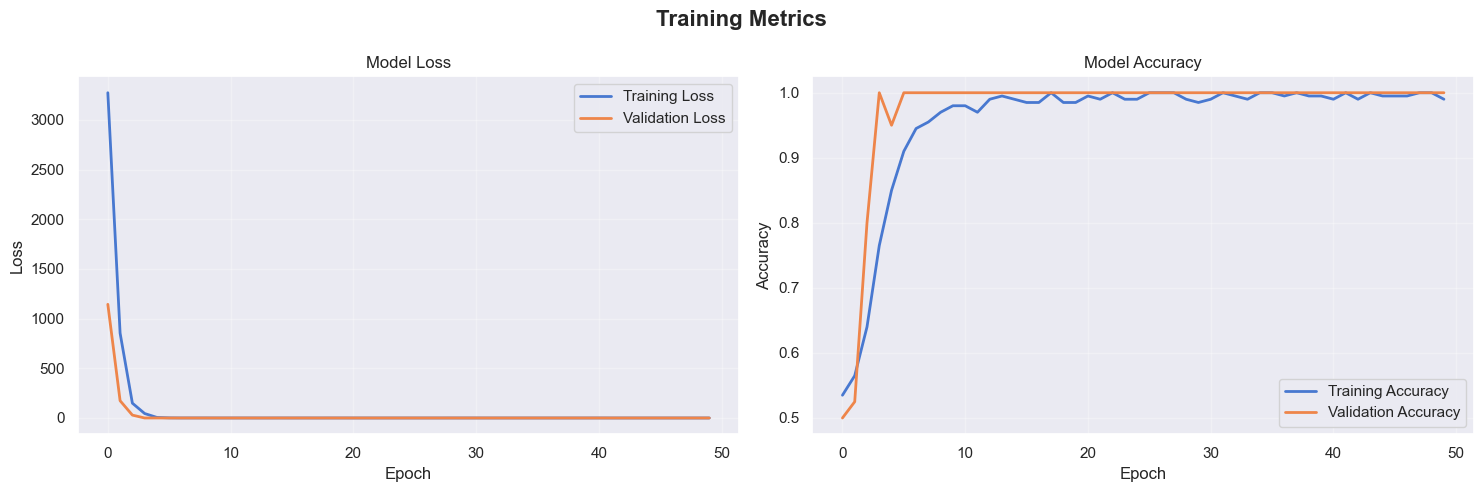

>> Training Summary:
   - Total epochs: 50
   - Validation data: Yes
   - Final training loss: 0.0777
   - Final validation loss: 0.0000
   - Final training accuracy: 0.9900
   - Final validation accuracy: 1.0000


In [6]:
from mlgraphy import plot_metrics
plot_metrics(hist)

In [ ]:
import numpy as np
from PIL import Image
import requests
from io import BytesIO

img_path = 'https://media.istockphoto.com/id/1443562748/photo/cute-ginger-cat.jpg?s=612x612&w=0&k=20&c=vvM97wWz-hMj7DLzfpYRmY2VswTqcFEKkC437hxm3Cg='

if img_path.startswith('http'):
    response = requests.get(img_path)
    img = Image.open(BytesIO(response.content)).resize((180, 180))
else:
    img = Image.open(img_path).resize((180, 180))

img_array = np.array(img) / 255.0  # normalize to [0, 1]
img_array = img_array.reshape((1, 180, 180, 3))

prediction = model.predict(img_array)
print(f"Prediction: {prediction[0][0]}") 
if prediction[0][0] > 0.50:
    print("The image is classified as a dog.")
else:
    print("The image is classified as a cat.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Prediction: 0.4967562258243561
The image is classified as a cat.
